<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [148]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [149]:
# Answer:
rows = len(movies)
rows

979

In [150]:
columns = len(movies.columns)
columns

6

#### Check the data type of each column.

In [151]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [152]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [153]:
# Answer:
movies['duration'].sort_values()

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

In [111]:
Shortest_movie=movies['duration'].min()
Shortest_movie

64

In [113]:
Longest_movie=movies['duration'].max()
Longest_movie

242

#### Create a histogram of duration, choosing an "appropriate" number of bins.

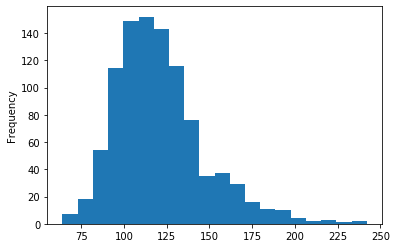

In [114]:
# Answer:
Histogram = movies['duration'].plot(kind = 'hist', bins = 20)

#### Use a box plot to display that same data.

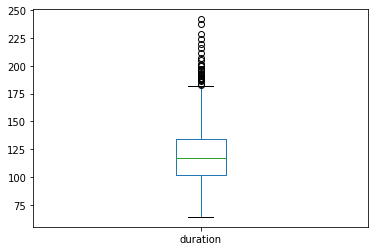

In [115]:
# Answer:
Boxplot= movies['duration'].plot(kind = 'box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [154]:
# Answer:
Ratings = movies[['content_rating','title']].groupby('content_rating').count()


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Number of Titles')

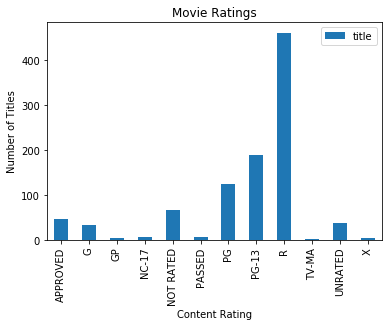

In [155]:
# Answer:
Ratings.plot(kind = 'bar', title = 'Movie Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [156]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED')

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [157]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(['X','TV-MA'],'NC-17')

In [158]:
movies['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

In [159]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [160]:
# Answer:
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [161]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [162]:
# Answer: (have to fix updating the variable movies['content_rating'])
movies.at[(187),'content_rating'] = 'PG'
movies.at[(649),'content_rating'] = 'R'
movies.at[(936),'content_rating'] = 'PG-13'

In [163]:
movies['content_rating'].value_counts()

R          461
PG-13      190
UNRATED    160
PG         124
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [57]:
# Answer:
movies[movies['duration'] >= 120]['star_rating'].mean()

7.948898678414082

In [58]:
movies['star_rating'].mean()

7.8897854954034985

In [59]:
movies[movies['duration'] < 120]['star_rating'].mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

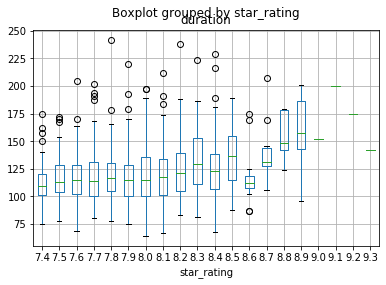

In [63]:
# Answer:
movies.boxplot(column='duration', by= 'star_rating');

#### Calculate the average duration for each genre.

In [64]:
# Answer:
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

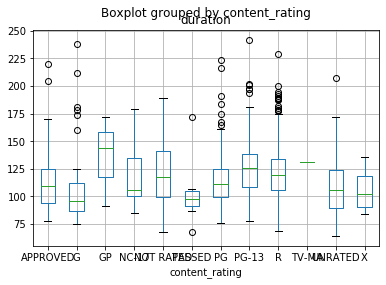

In [65]:
# Answer: similar to visualizing the relationship between duration and star rating
movies.boxplot(column='duration', by= 'content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [121]:
# Answer:
movies.sort_values('star_rating',ascending=False).groupby('genre')['title','star_rating'].first()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [122]:
# Answer:
duplicates = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
duplicates
#The duplicated titles don't seem to be duplicated movies based on comparison of other columns.

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [123]:
# Answer:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [124]:
Relevant_Genres = movies['genre'].value_counts()[movies['genre'].value_counts()>10].index

In [125]:
movies[movies['genre'].isin(Relevant_Genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [109]:
# Answer:
Genre_value_counts=movies['genre'].value_counts()
R2_genre=(Genre_value_counts).index
R2_genre

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery', 'Western', 'Sci-Fi', 'Thriller',
       'Film-Noir', 'Family', 'Fantasy', 'History'],
      dtype='object')

In [104]:
movies[movies['genre'].isin(Genre_value_counts)].groupby('genre')['star_rating'].mean()

Series([], Name: star_rating, dtype: float64)

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!